In [223]:

from multiprocessing import Process, Queue
import glob
import pandas as pd
import os
import re
import matplotlib.pyplot as plt
import math as m
import numpy as np
%matplotlib inline
plt.style.use('ggplot')
import seaborn as sns
sns.set(color_codes=True)

In [224]:
fuel = pd.DataFrame.from_csv('Fuel Efficiciency/Combustible - copia.csv', index_col=None)
fuel.head(100)

,IN,Date,Train_Bulletin,Train_nbr,Train_nbr2,Train_int,id_Type,Type,Id_Sub_Type,Sub_Type,...,Hours,Kilometers,Liters,Net_Ton_Km,Gross_Ton_km,Use_GTK,Lts_x_GTK,Lts_x_GTK_Hr,Net_Tons,Gross_Tons
0,MANIOBRA,18/3/2011,4604,160E,E,160,1,CARGA,2,CARGA GENERAL,...,12,239.8,200.0,0,0,False,2654.545455,2654.545455,633923,1437383
1,MANIOBRA,18/3/2011,4606,102,X,102,1,CARGA,3,DERIVADOS DE PETROLEO,...,10,261.7,250.0,0,0,False,2435.815467,2435.815467,371451,1302941
2,MANIOBRA,18/3/2011,4599,201,X,201,2,ESPECIALES,8,SERVICIO INTERNO,...,12,182.1,300.0,0,0,False,2654.545455,2654.545455,1036000,1455460
3,MANIOBRA,18/3/2011,4610,2,X,2,3,MIXTO,10,TREN MIXTO AL SUR,...,11,0.0,200.0,0,0,False,2173.351099,2173.351099,165000,355280
4,MANIOBRA,18/3/2011,4603,8,X,8,4,PASAJEROS,1,AUTOMOTOR,...,12,239.8,300.0,0,0,False,2273.585723,2273.585723,0,19000
5,MANIOBRA,18/3/2011,4601,13,X,13,4,PASAJEROS,4,EXPRESO ORIENTAL,...,10,239.8,150.0,0,0,False,2273.585723,2273.585723,36000,221000
6,MANIOBRA,18/3/2011,4608,9,X,9,4,PASAJEROS,11,TREN REGIONAL,...,7,134.2,50.0,0,0,False,2330.985915,2330.985915,65453,296453
7,MANIOBRA,18/3/2011,4609,10,X,10,4,PASAJEROS,11,TREN REGIONAL,...,4,134.2,50.0,0,0,False,2010.068405,2010.068405,74605,289605
8,MANIOBRA,19/3/2011,4619,7,X,7,4,PASAJEROS,1,AUTOMOTOR,...,5,239.8,50.0,0,0,False,2173.351099,2173.351099,0,19000
9,MANIOBRA,20/3/2011,4626,162,X,162,1,CARGA,2,CARGA GENERAL,...,12,239.8,200.0,0,0,False,2273.585723,2273.585723,490818,1612508


In [225]:
fuel = pd.read_csv('Fuel Efficiciency/Comb_10_17.csv',index_col=None, encoding='latin-1')
fuel.head(100)


,IN,Train_Bulletin,Sector,DateTime1,Id_Loc,Track_id,Id_Engineer,Id_fireman,Hours,Kilometers,...,Auxiliar,Train_nbr,Id_Sub_Type,Sub_Type,id_Type,Type,Traccion,Direction,Id_Model_Loc,Model_Loc
0,TREN,32175,N,2017-04-26,11,1,67.0,252.0,3.58,56.1,...,SEJAS CHOQUELA JUAN CARLOS,172,2.0,CARGA GENERAL,1.0,CARGA,S,0.0,9,GE U10B
1,TREN,32175,N,2017-04-26,5409,1,67.0,252.0,4.63,56.1,...,SEJAS CHOQUELA JUAN CARLOS,172,2.0,CARGA GENERAL,1.0,CARGA,S,0.0,38,GE U20C
2,TREN,32177,N,2017-04-26,11,1,104.0,285.0,2.25,35.1,...,SUAREZ VACA PABLO MIGUEL,171,2.0,CARGA GENERAL,1.0,CARGA,S,1.0,9,GE U10B
3,TREN,32178,N,2017-04-26,5409,1,67.0,252.0,3.08,56.1,...,SEJAS CHOQUELA JUAN CARLOS,173,2.0,CARGA GENERAL,1.0,CARGA,S,1.0,38,GE U20C
4,TREN,32187,N,2017-04-27,6931,1,18.0,286.0,1.75,35.1,...,MORENO ACEBO ADAN,171,2.0,CARGA GENERAL,1.0,CARGA,S,1.0,43,NaN
5,TREN,32188,N,2017-04-27,21,1,72.0,91.0,3.33,56.1,...,ROJAS POQUIVIQUI WILBERTO,172,2.0,CARGA GENERAL,1.0,CARGA,S,0.0,28,GM
6,TREN,32190,N,2017-04-27,21,1,72.0,91.0,5.05,56.1,...,ROJAS POQUIVIQUI WILBERTO,171E,2.0,CARGA GENERAL,1.0,CARGA,S,1.0,28,GM
7,TREN,32207,N,2017-04-28,22,1,14.0,32.0,3.42,56.1,...,HIDALGO ARREDONDO VICTOR,172,2.0,CARGA GENERAL,1.0,CARGA,S,0.0,40,GM
8,TREN,32215,N,2017-04-28,22,1,14.0,32.0,2.33,56.1,...,HIDALGO ARREDONDO VICTOR,171,2.0,CARGA GENERAL,1.0,CARGA,S,1.0,40,GM
9,TREN,32238,N,2017-04-30,11,1,65.0,175.0,16.08,56.1,...,MONTALVAN ZARATE FERNANDO,172,2.0,CARGA GENERAL,1.0,CARGA,S,0.0,9,GE U10B


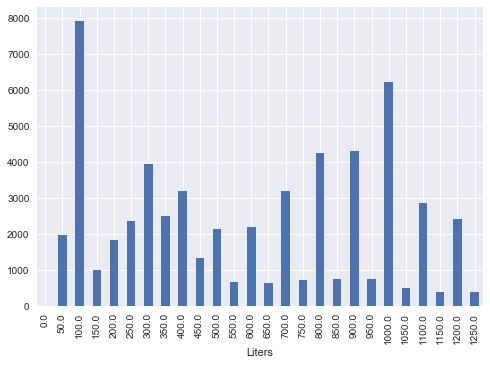

In [226]:
f = fuel
# Filter out Shunting Locomotives, choose only consumption between 40 and 1300 liters and postive GTK
f = f[(f.Liters >40) & (f.Liters < 1300) & (f.IN == 'TREN') & (f.Gross_Ton_km >0)]
# Show the distribution of consumption in 50 liter intervals
f.groupby(f.Liters // 50*50).size().plot(kind='bar')


In [227]:
# Cast the following columns as float
f[['Hours','Kilometers','Hours','Liters','Net_Ton_Km','Gross_Ton_km','Net_Ton_Km','Gross_Tons','Net_Tons']] = f[['Hours','Kilometers','Hours','Liters','Net_Ton_Km','Gross_Ton_km','Net_Ton_Km','Gross_Tons','Net_Tons']].astype(float)

C:\Users\225648\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\frame.py:2440: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [228]:
# Replace NaN with 0
#f[['Train_Bulletin','id_Type','Id_Sub_Type','Id_Model_Loc','Id_Loc','Direction','Track_id','Id_Engineer','Id_fireman']] = f[['Train_Bulletin','id_Type','Id_Sub_Type','Id_Model_Loc','Id_Loc','Direction','Track_id','Id_Engineer','Id_fireman']].fillna(0, inplace= True)
# Cast the following columns as int
#f[['Train_Bulletin','id_Type','Id_Sub_Type','Id_Model_Loc','Id_Loc','Direction','Track_id','Id_Engineer','Id_fireman']] = f[['Train_Bulletin','id_Type','Id_Sub_Type','Id_Model_Loc','Id_Loc','Direction','Track_id','Id_Engineer','Id_fireman']].astype(int)

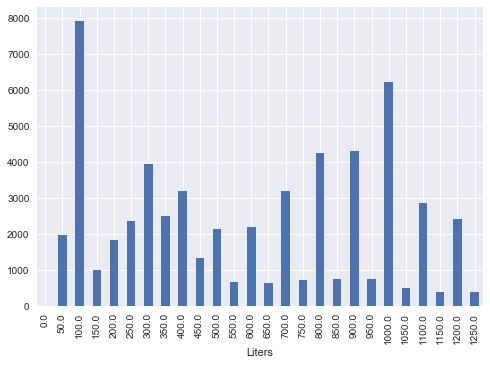

In [229]:
f = fuel
# Filter Shunting Locomotives, choose only consumption between 40 and 1300 liters and postivo GTK
f = f[(f.Liters >40) & (f.Liters < 1300) & (f.IN == 'TREN') & (f.Gross_Ton_km >0)]
# Show the distribution of consumption in 50 liter intervals
f.groupby(f.Liters // 50*50).size().plot(kind='bar')


In [277]:
f['Lts_x_GTK'] = ((f['Liters'] * 1000)/ (f['Gross_Ton_km'] / 1000000)).astype(float)

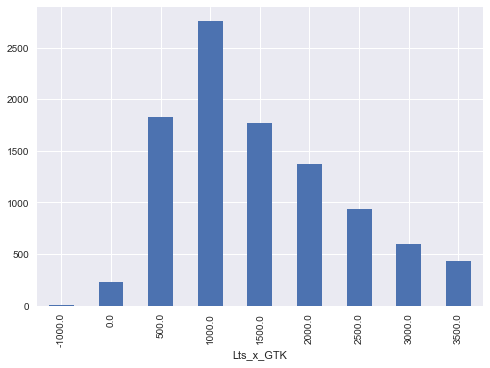

In [278]:
f = f[(f.Lts_x_GTK < 13000)]
f.groupby(f.Lts_x_GTK // 500*500 ).size().plot(kind='bar')


In [232]:
# percentaje of observations including shunting
len(f)/len(fuel)

0.5528404094792492

In [233]:
z = fuel
z = z[(z.Gross_Ton_km <=0)]
len(z)

30585

In [234]:
# percentaje of observations excluding GTK < 0
len(f)/(len(fuel)-len(z))

0.8276344016121693

In [235]:
len(fuel)

92117

In [236]:
f.Type.value_counts()

CARGA         37503
PASAJEROS     10938
MIXTO          1263
ESPECIALES     1218
Name: Type, dtype: int64

In [237]:
f.Sub_Type.value_counts()

CARGA GENERAL            29031
DERIVADOS DE PETROLEO     8472
EXPRESO ORIENTAL          6374
TREN REGIONAL             4490
TREN MIXTO AL SUR         1263
SERVICIO INTERNO          1078
LOCOMOTORA SOLA            100
AUTOMOTOR                   74
SOCORRO                     40
Name: Sub_Type, dtype: int64

In [238]:
f.Model_Loc.value_counts()

GE U20C      26838
GE U10B      15339
GM            6039
GE C23EMP     2620
FB              69
Name: Model_Loc, dtype: int64

In [239]:
f.Locomotive.value_counts()

2010    2418
976     2417
2009    2408
2006    2323
2004    2316
2002    2245
2005    2228
2003    2137
2000    2107
2007    2035
2001    1998
975     1976
977     1868
978     1766
971     1742
2011    1620
1201    1579
974     1507
1203    1498
979     1478
2008    1382
972     1382
2012    1203
973     1183
1602    1114
1601     950
1202     893
2301     519
2303     423
2201     418
2302     417
2305     379
2307     312
2304     309
2306     261
331       27
347       23
1014      21
966       20
345       19
8689       5
Name: Locomotive, dtype: int64

In [240]:
f.Sector.value_counts()

E    44047
N     3877
S     3002
Name: Sector, dtype: int64

In [241]:
f.Direction.value_counts()

1.0    26063
0.0    24859
Name: Direction, dtype: int64

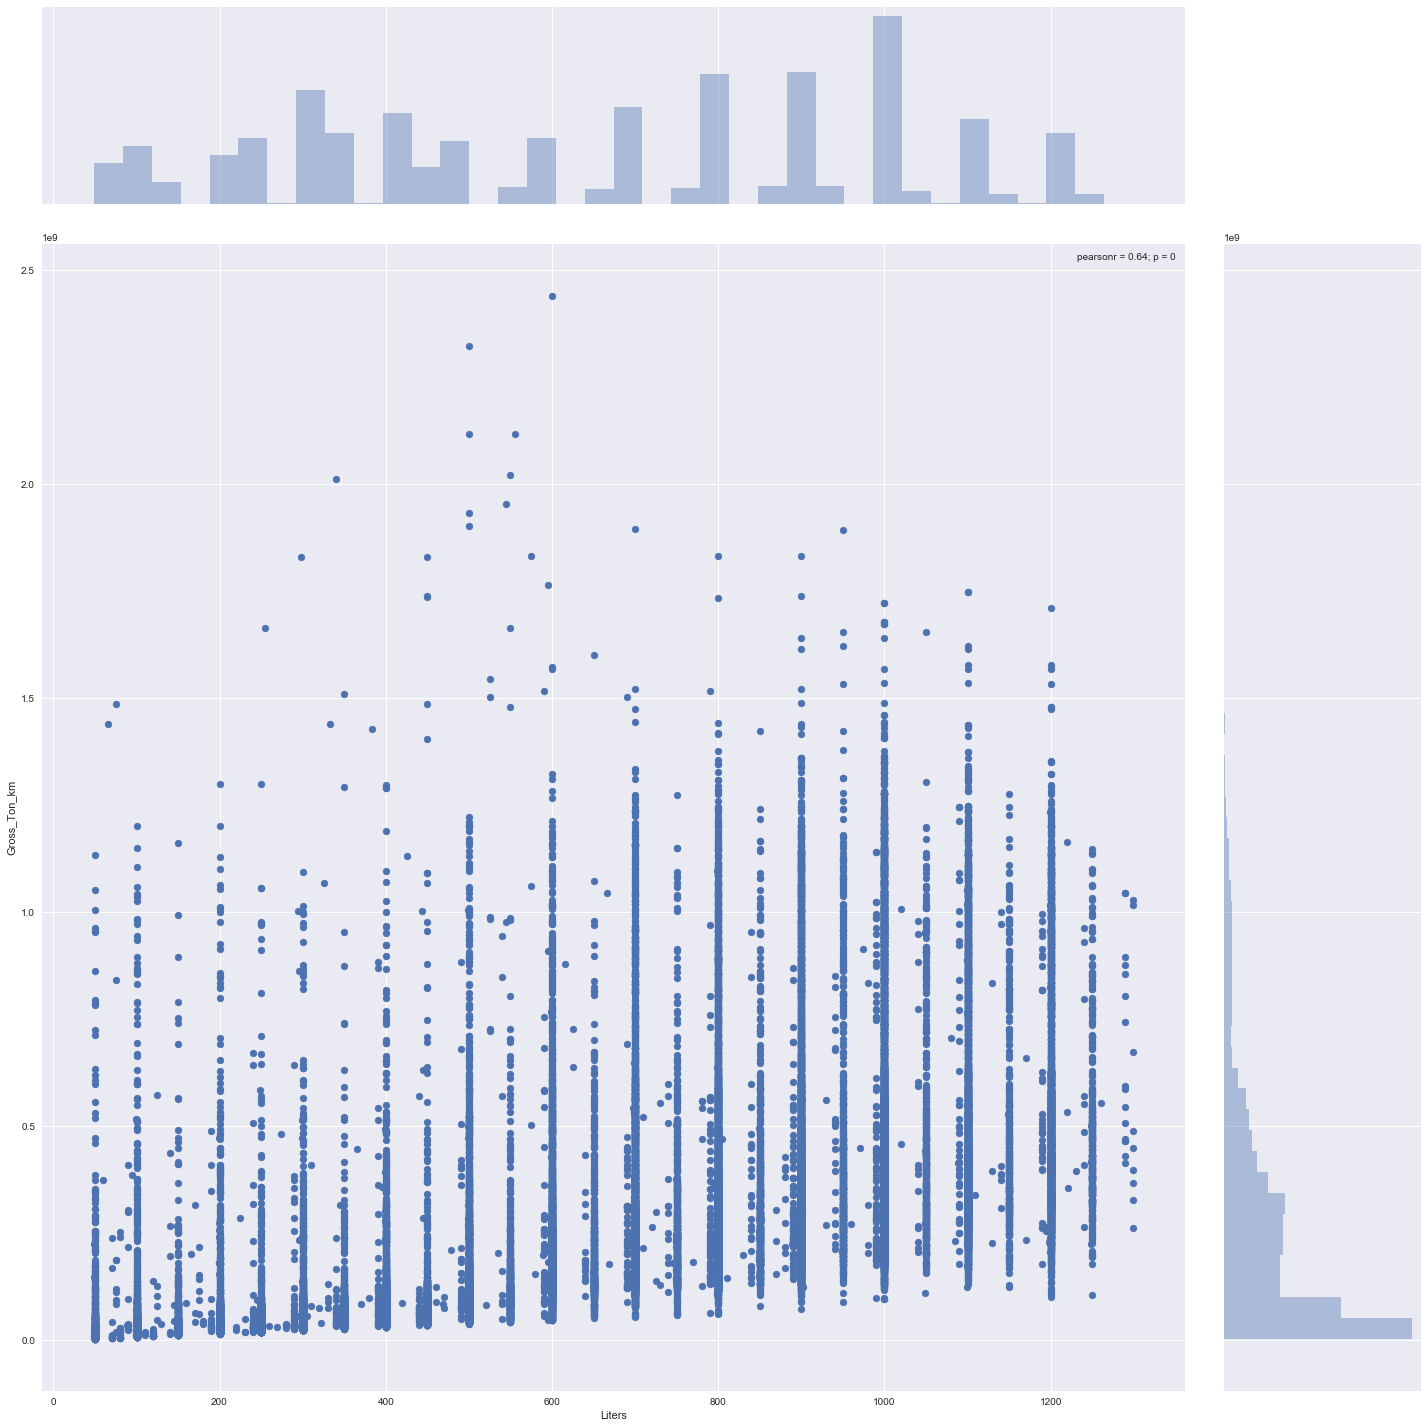

In [242]:
# Show the whole data distribution with a  joint
sns.jointplot(x="Liters", y="Gross_Ton_km", data=f, size=20)

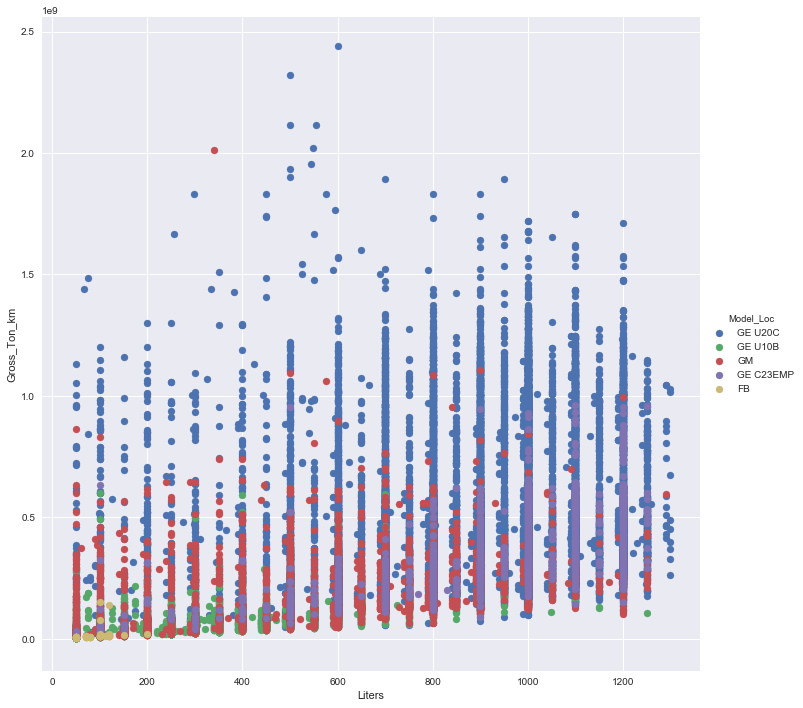

In [243]:
# We'll use seaborn's FacetGrid to color the scatterplot by Locomotive Type
sns.FacetGrid(f, hue="Model_Loc", size=10) \
   .map(plt.scatter, "Liters", "Gross_Ton_km") \
   .add_legend()


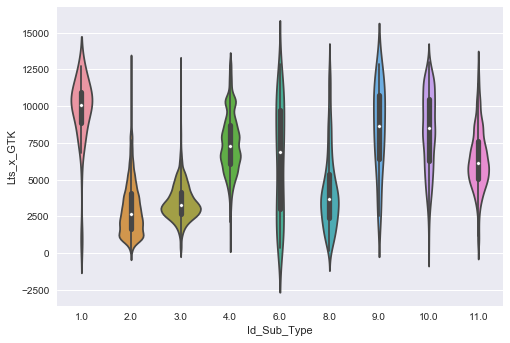

In [244]:
# A violin plot 
# Denser regions of the data are fatter, and sparser thiner in a violin plot
sns.violinplot(x="Id_Sub_Type", y="Lts_x_GTK", data=f, size=60)

In [245]:
cols = list(f.loc[:,'Id_Sub_Type':'Sub_Type']) + list(f.loc[:,'Hours':'Liters']) + ['Lts_x_GTK']
g= f[cols]
# Show the mean grouped by type of train
g.groupby(['Id_Sub_Type', 'Sub_Type']).mean()

,,Hours,Kilometers,Liters,Lts_x_GTK
Id_Sub_Type,Sub_Type,,,,
1.0,AUTOMOTOR,5.333514,248.297297,82.162162,9740.747754
2.0,CARGA GENERAL,11.426360,183.256050,750.543798,3094.766664
3.0,DERIVADOS DE PETROLEO,10.906593,211.182743,819.334632,3467.589326
4.0,EXPRESO ORIENTAL,7.259691,212.408660,328.516159,7497.434812
6.0,LOCOMOTORA SOLA,5.650600,136.273000,193.010000,6305.637983
8.0,SERVICIO INTERNO,6.988673,140.183952,401.811688,4221.101050
9.0,SOCORRO,6.045000,126.052500,145.000000,8504.590589
10.0,TREN MIXTO AL SUR,9.027894,267.135471,401.288994,8321.508349
11.0,TREN REGIONAL,6.595621,212.303964,333.749889,6366.821656


In [246]:
# Show the standard deviation grouped by type of train
g.groupby(['Id_Sub_Type', 'Sub_Type']).std()

,,Hours,Kilometers,Liters,Lts_x_GTK
Id_Sub_Type,Sub_Type,,,,
1.0,AUTOMOTOR,1.222070,29.209592,31.286142,2380.871732
2.0,CARGA GENERAL,206.062539,77.704742,339.032418,1967.030575
3.0,DERIVADOS DE PETROLEO,8.807103,56.432228,217.512862,1214.050806
4.0,EXPRESO ORIENTAL,109.717589,55.578180,98.550620,2045.778165
6.0,LOCOMOTORA SOLA,3.780496,102.159812,148.725732,3743.984024
8.0,SERVICIO INTERNO,4.558289,75.133259,337.503133,2680.370142
9.0,SOCORRO,3.750197,80.838436,105.490308,2925.046868
10.0,TREN MIXTO AL SUR,1.496969,26.242374,140.138412,2660.530521
11.0,TREN REGIONAL,1.627390,55.873728,105.434448,2110.266741


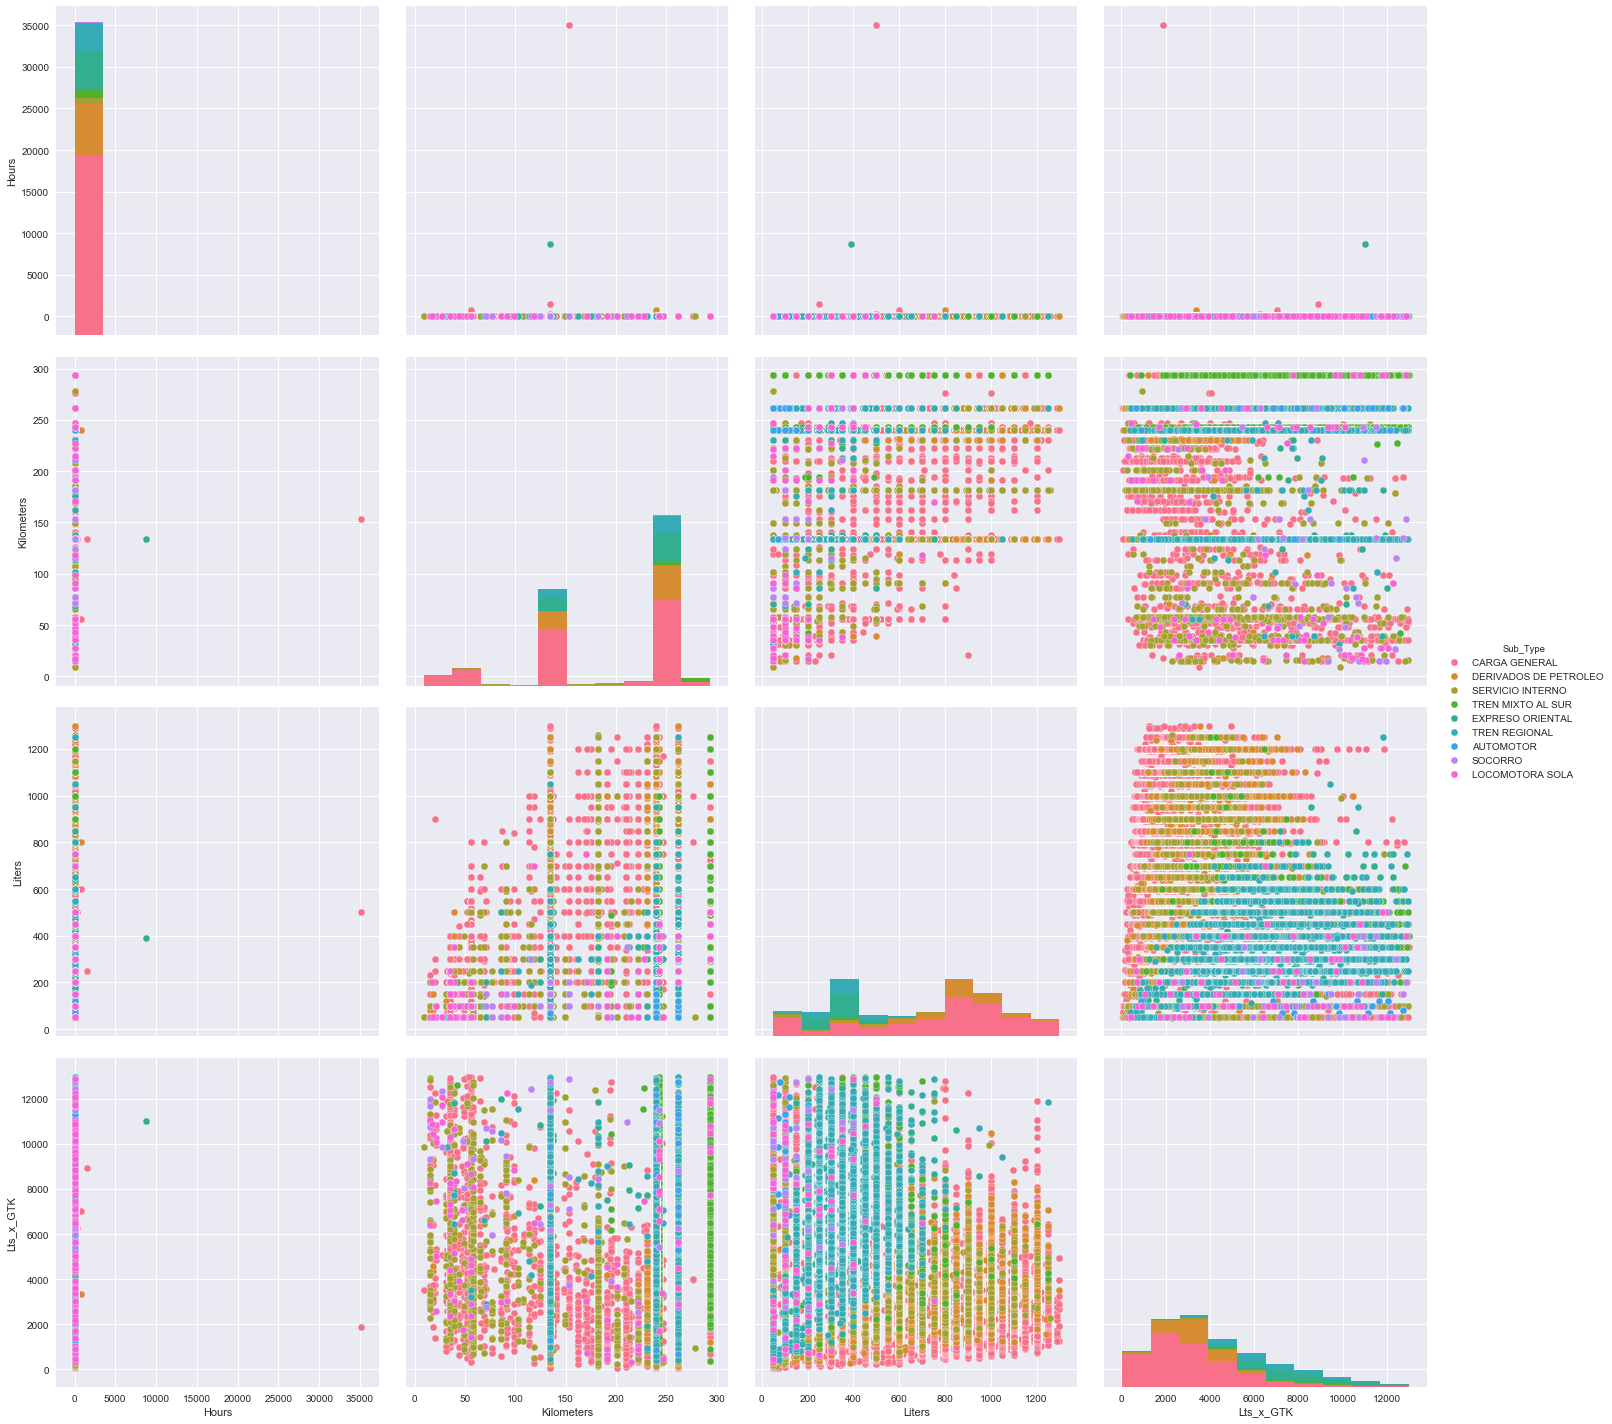

In [247]:
# Another useful seaborn plot is the pairplot, which shows the bivariate relation
# between each pair of features
# 
# From the pairplot, we'll see what seperates all pair of selected variables

sns.pairplot(g.drop("Id_Sub_Type", axis=1), hue="Sub_Type", size=5)

In [248]:
# Don't take into account special trains - Short distance
f = f[(f.id_Type != 2)]

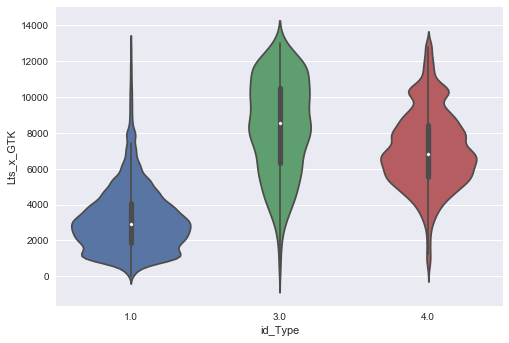

In [249]:
# A violin plot 
# Let's reduce the division to type of train
sns.violinplot(x="id_Type", y="Lts_x_GTK", data=f, size=60)

In [250]:
cols = list(f.loc[:,'id_Type':'Type']) + list(f.loc[:,'Hours':'Liters']) + ['Lts_x_GTK']
gtype= f[cols]
# Show the mean grouped by type of train
gtype.groupby(['id_Type', 'Type']).mean()

,,Hours,Kilometers,Liters,Lts_x_GTK
id_Type,Type,,,,
1.0,CARGA,11.308944,189.564744,766.083780,3178.988022
3.0,MIXTO,9.027894,267.135471,401.288994,8321.508349
4.0,PASAJEROS,6.974062,212.608484,328.997897,7048.500097


In [251]:
# Show the standard deviation grouped by type of train
gtype.groupby(['id_Type', 'Type']).std()

,,Hours,Kilometers,Liters,Lts_x_GTK
id_Type,Type,,,,
1.0,CARGA,181.347419,74.362049,317.002913,1830.945652
3.0,MIXTO,1.496969,26.242374,140.138412,2660.530521
4.0,PASAJEROS,83.760048,55.638525,103.199531,2159.077757


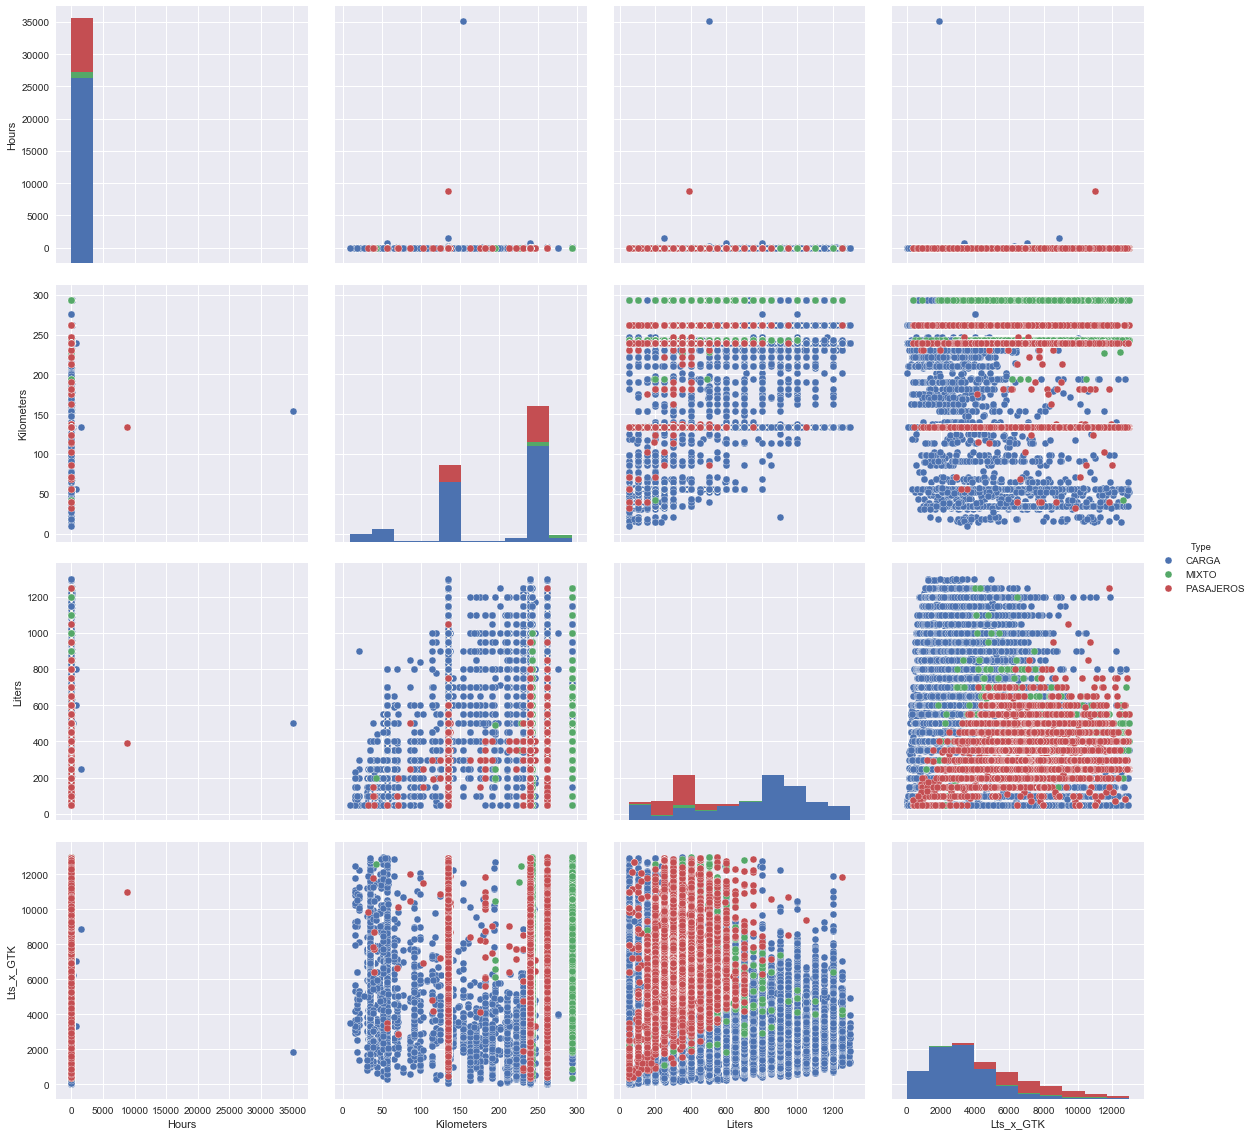

In [252]:
# Another useful seaborn plot is the pairplot, which shows the bivariate relation
# between each pair of features
# 
# From the pairplot, we'll see what seperates all pair of selected variables

sns.pairplot(gtype.drop("id_Type", axis=1), hue="Type", size=4)

In [253]:
# Only take into account Freight Trainas
f = f[(f.id_Type == 1)]

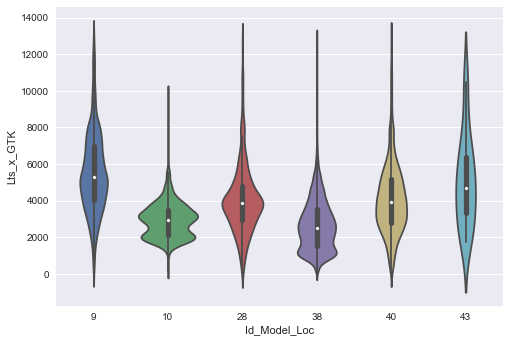

In [254]:
# A violin plot 
# Let's reduce the division to locomotive model
sns.violinplot(x="Id_Model_Loc", y="Lts_x_GTK", data=f, size=60)

In [255]:
cols = list(f.loc[:,'Id_Model_Loc':'Model_Loc']) + list(f.loc[:,'Hours':'Liters']) + ['Lts_x_GTK']
gtype= f[cols]
# Show the mean grouped by type of train
gtype.groupby(['Id_Model_Loc', 'Model_Loc']).mean()

,,Hours,Kilometers,Liters,Lts_x_GTK
Id_Model_Loc,Model_Loc,,,,
9,GE U10B,8.137798,153.823725,331.512963,5532.707105
10,GE C23EMP,10.643183,202.190272,940.941402,2939.331650
28,GM,7.137799,121.387276,433.644433,4044.571275
38,GE U20C,12.522722,202.975632,864.057526,2676.957681
40,GM,8.613735,158.277876,557.989793,4106.815894


In [256]:
# Show the standard deviation grouped by type of train
gtype.groupby(['Id_Model_Loc', 'Model_Loc']).std()

,,Hours,Kilometers,Liters,Lts_x_GTK
Id_Model_Loc,Model_Loc,,,,
9,GE U10B,24.881120,93.455504,220.520110,2209.160189
10,GE C23EMP,3.419749,63.115015,218.446315,949.163370
28,GM,8.409172,82.377792,311.533279,1885.927635
38,GE U20C,218.794778,63.049015,244.598933,1446.228026
40,GM,4.671699,87.116987,313.504480,1957.234401


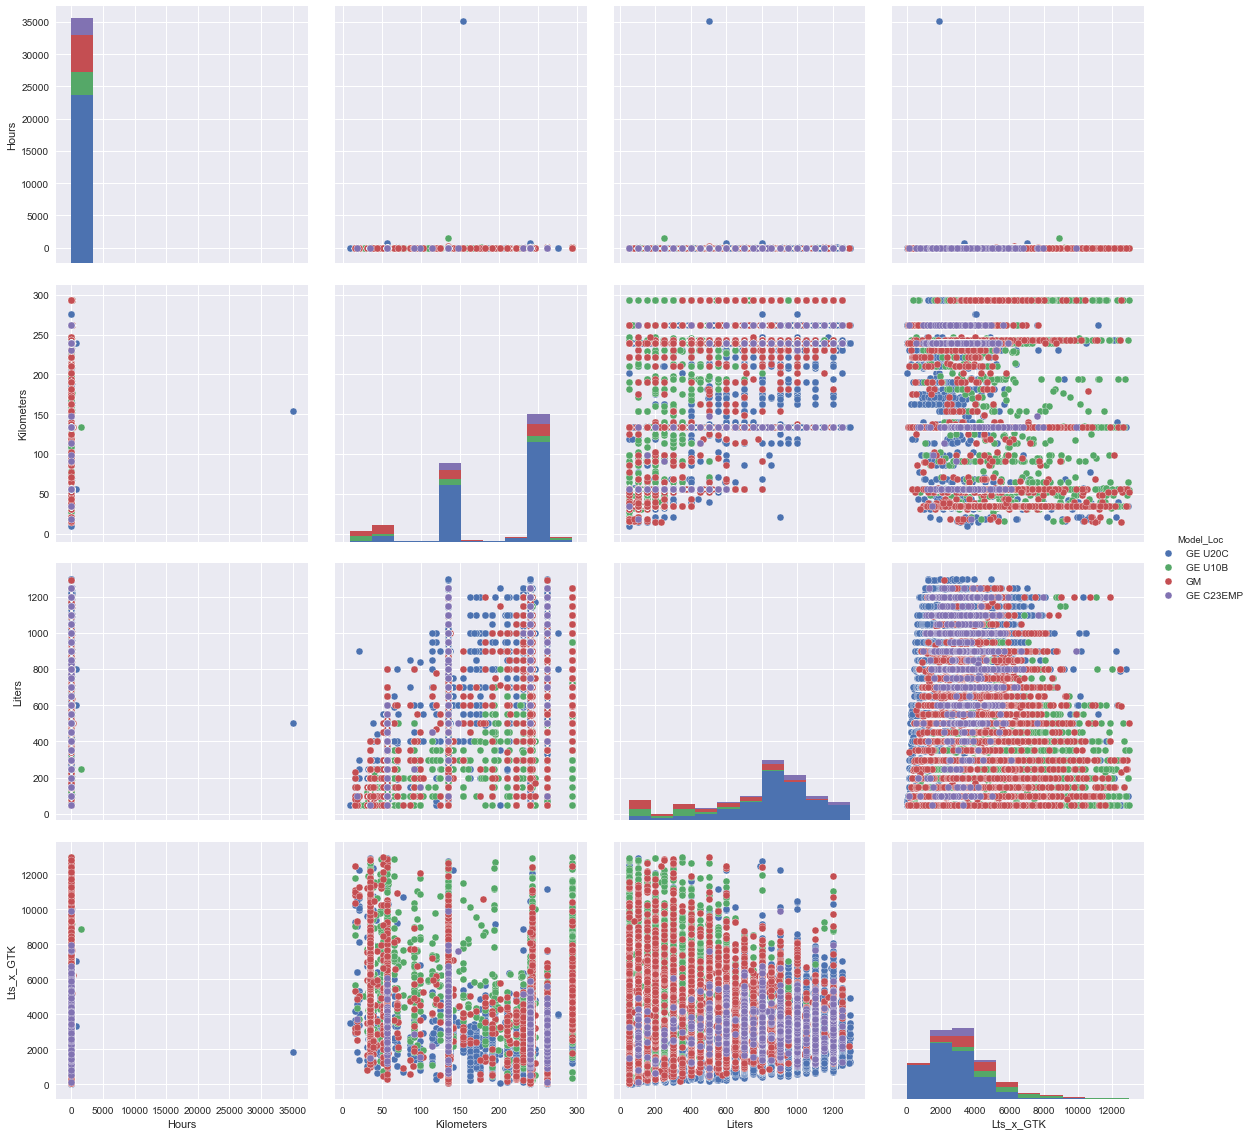

In [257]:
# From the pairplot, we'll see what seperates all pair of selected variables

sns.pairplot(gtype.drop("Id_Model_Loc", axis=1), hue="Model_Loc", size=4)

In [273]:
f = fuel
f['Lts_x_GTK'] = ((f['Liters'] * 1000)/ (f['Gross_Ton_km'] / 1000000)).astype(float)
# Only take into account Freight Trains
f = f[(f.id_Type == 1.0)]
# Only take into account General Cargo Freight Trains, U20 Locomotives, originating in Santa Cruz going to Quijarro
f = f[(f.Id_Sub_Type == 2.0) & (f.Id_Model_Loc== 38) & (f.Direction == 0.0) & (f.Lts_x_GTK < 4000.0)  & ((f.Track_id ==2) | (f.Track_id ==3) | (f.Track_id ==4))]
f.head(100)

,IN,Train_Bulletin,Sector,DateTime1,Id_Loc,Track_id,Id_Engineer,Id_fireman,Hours,Kilometers,...,Train_nbr,Id_Sub_Type,Sub_Type,id_Type,Type,Traccion,Direction,Id_Model_Loc,Model_Loc,Lts_x_GTK
74,TREN,32160,E,2017-04-25,10,2,33.0,234.0,11.82,261.7,...,162E,2.0,CARGA GENERAL,1.0,CARGA,S,0.0,38,GE U20C,2608.082870
93,TREN,32206,E,2017-04-28,6550,2,33.0,92.0,15.08,261.7,...,162E,2.0,CARGA GENERAL,1.0,CARGA,S,0.0,38,GE U20C,2640.422006
102,TREN,32232,E,2017-04-30,6180,2,38.0,56.0,11.17,170.3,...,160E,2.0,CARGA GENERAL,1.0,CARGA,S,0.0,38,GE U20C,2703.821528
108,TREN,32247,E,2017-05-01,8,2,114.0,223.0,14.48,261.7,...,158,2.0,CARGA GENERAL,1.0,CARGA,S,0.0,38,GE U20C,2024.031611
121,TREN,32287,E,2017-05-04,4,2,26.0,221.0,12.42,261.7,...,158E,2.0,CARGA GENERAL,1.0,CARGA,S,0.0,38,GE U20C,2597.439684
135,TREN,32324,E,2017-05-07,1,2,33.0,92.0,12.08,170.3,...,158E,2.0,CARGA GENERAL,1.0,CARGA,S,0.0,38,GE U20C,2886.030893
140,TREN,32338,E,2017-05-08,5,2,34.0,254.0,11.13,261.7,...,158E,2.0,CARGA GENERAL,1.0,CARGA,S,0.0,38,GE U20C,2066.812716
142,TREN,32347,E,2017-05-09,8,2,68.0,252.0,14.58,191.0,...,160E,2.0,CARGA GENERAL,1.0,CARGA,S,0.0,38,GE U20C,2529.289012
148,TREN,32363,E,2017-05-10,7,2,114.0,29.0,12.97,261.7,...,158E,2.0,CARGA GENERAL,1.0,CARGA,S,0.0,38,GE U20C,2388.732975
167,TREN,32409,E,2017-05-14,7,2,33.0,265.0,12.75,261.7,...,158,2.0,CARGA GENERAL,1.0,CARGA,S,0.0,38,GE U20C,2349.178378


In [274]:
fuel.dtypes

IN                 object
Train_Bulletin      int64
Sector             object
DateTime1          object
Id_Loc              int64
Track_id            int64
Id_Engineer       float64
Id_fireman        float64
Hours             float64
Kilometers        float64
Liters            float64
Net_Ton_Km        float64
Gross_Ton_km      float64
Net_Tons            int64
Gross_Tons          int64
Date               object
Locomotive          int64
Track              object
Maquinista         object
Auxiliar           object
Train_nbr          object
Id_Sub_Type       float64
Sub_Type           object
id_Type           float64
Type               object
Traccion           object
Direction         float64
Id_Model_Loc        int64
Model_Loc          object
Lts_x_GTK         float64
dtype: object

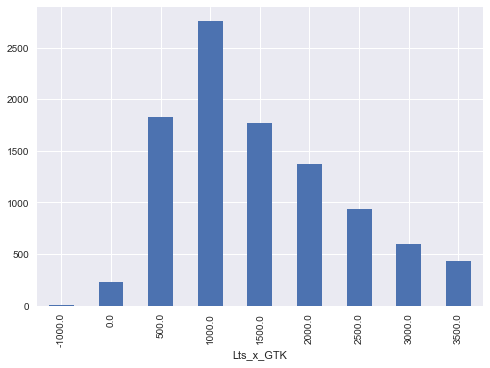

In [275]:
f.groupby((f.Lts_x_GTK // 500*500) ).size().plot(kind='bar')

In [279]:
# A violin plot 
# Let's reduce the division to Cargo, Locomotive, Origin
sns.violinplot(x="Track_id", y="Lts_x_GTK", data=f, size=60)

C:\Users\225648\AppData\Local\Continuum\Anaconda3\lib\site-packages\numpy\lib\function_base.py:964: RuntimeWarning: invalid value encountered in multiply
  scl = np.multiply(avg, 0) + scl
C:\Users\225648\AppData\Local\Continuum\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2490: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


ValueError: array must not contain infs or NaNs

In [ ]:
cols = list(f.loc[:,'Track_id':'Track']) + list(f.loc[:,'Hours':'Liters']) + ['Lts_x_GTK']
gtrack= f[cols]
# Show the mean grouped by type of train
gtrack.groupby(['Track_id', 'Track']).mean()

In [ ]:
# Show the standard deviation grouped by type of train
gtrack.groupby(['Track_id', 'Track']).std()

In [ ]:
# From the pairplot, we'll see what seperates all pair of selected variables

sns.pairplot(gtrack.drop("Track_id", axis=1), hue="Track", size=4)

In [ ]:
f = fuel

# Replace NaN with 0
f[['Train_Bulletin','id_Type','Id_Sub_Type','Id_Model_Loc','Id_Loc','Direction','Track_id','Id_Engineer','Id_fireman']] = f[['Train_Bulletin','id_Type','Id_Sub_Type','Id_Model_Loc','Id_Loc','Direction','Track_id','Id_Engineer','Id_fireman']].fillna(0, inplace= True)
# Cast the following columns as int
f[['Train_Bulletin','id_Type','Id_Sub_Type','Id_Model_Loc','Id_Loc','Direction','Track_id','Id_Engineer','Id_fireman']] = f[['Train_Bulletin','id_Type','Id_Sub_Type','Id_Model_Loc','Id_Loc','Direction','Track_id','Id_Engineer','Id_fireman']].astype(int)

In [ ]:
# Only take into account Freight Trains
f = f[(f.id_Type == 1)]
# Only take into account General Cargo Freight Trains, U20 Locomotives, originating in Santa Cruz going to Quijarro
f = f[(f.Id_Sub_Type == 2) & (f.Id_Model_Loc== 3) & (f.Direction == 1) & (f.Liters > 0) & (f.Lts_x_GTK < 15000)  & ((f.Track_id ==2) | (f.Track_id ==3) | (f.Track_id ==4))]

In [ ]:
f.groupby((f.Lts_x_GTK // 500*500) ).size().plot(kind='bar')

In [ ]:
# A violin plot 
# Let's reduce the division to Cargo, Locomotive, Origin
sns.violinplot(x="Track_id", y="Lts_x_GTK", data=f, size=60)

In [ ]:
cols = list(f.loc[:,'Track_id':'Track']) + list(f.loc[:,'Hours':'Liters']) + ['Lts_x_GTK']
gtrack= f[cols]
# Show the mean grouped by type of train
gtrack.groupby(['Track_id', 'Track']).mean()

In [ ]:
# Show the standard deviation grouped by type of train
gtrack.groupby(['Track_id', 'Track']).std()

In [ ]:
# From the pairplot, we'll see what seperates all pair of selected variables

sns.pairplot(gtrack.drop("Track_id", axis=1), hue="Track", size=4)